# QF 625 Introduction to Programming
## Lesson 09 | A Sample Exploratory Data Analysis (EDA) | `RE`view

### Let's import necessary modules first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option("max_rows", 30)
pd.set_option("min_rows", 20)

In [3]:
loan = pd.read_csv("loan.csv")
loan

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Let's inspect our data first

> How would you look at the first few rows of the DF?

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


> How would you look at all the column names?

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Wrangling

> How would you check the number of missing values in each column

In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
                              ...  
num_tl_90g_dpd_24m            39717
num_tl_op_past_12m            39717
pct_tl_nvr_dlq                39717
percent_bc_gt_75              39717
pub_rec_bankruptcies            697
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

> There are columns have a large number of missing values 

> Let's clean them first.

> How would you find the percentage of missing values in each column?

In [7]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
int_rate                        0.0
installment                     0.0
grade                           0.0
sub_grade                       0.0
                              ...  
num_tl_90g_dpd_24m            100.0
num_tl_op_past_12m            100.0
pct_tl_nvr_dlq                100.0
percent_bc_gt_75              100.0
pub_rec_bankruptcies            2.0
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

> How would you remove the columns having more than 90% missing values?

In [8]:
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
loan = loan.drop(missing_columns, axis=1)
loan.shape

(39717, 55)

> Let's check the number of missing values again.

In [10]:
100*(loan.isnull().sum()/len(loan.index)).sort_values(ascending = False)

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
                                ...    
total_pymnt                    0.000000
out_prncp_inv                  0.000000
out_prncp                      0.000000
initial_list_status            0.000000
total_acc                      0.000000
revol_bal                      0.000000
pub_rec                        0.000000
open_acc                       0.000000
earliest_cr_line               0.000000
id                             0.000000
Length: 55, dtype: float64

> How would you remove columns having more than 30% of missing values?

In [11]:
loan = loan.drop(["desc", "mths_since_last_delinq"], axis=1)

> Let's check number of missing values again

In [12]:
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
                                ...   
last_pymnt_amnt               0.000000
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
chargeoff_within_12_mths      0.140998
delinq_amnt                   0.000000
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
Length: 53, dtype: float64

> How would you check missing values rows-wise, by the way?

In [13]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
        ..
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

> How would you check whether some rows have more than 5 missing values

In [14]:
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> The column `int_rate` is character type, let's convert it to float.

> How would you use `lambda` to convert the data type?

In [16]:
loan["int_rate"] = loan["int_rate"].apply(lambda x: pd.to_numeric(x.split("%")[0]))

> Let's check the data types again.

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [18]:
import re

In [19]:
loan = loan[~loan["emp_length"].isnull()]
loan["emp_length"] = loan["emp_length"].apply(lambda x: re.findall("\d+", str(x))[0])
loan["emp_length"] = loan["emp_length"].apply(lambda x: pd.to_numeric(x))

> Let's take a look at type of the columns again

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

### Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [21]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

> Let's remove the set of variables above from the dataset.

In [22]:
df = loan.drop(variables_to_remove, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [23]:
df = df.drop(["title", "url", "zip_code", "addr_state"], axis=1)

> Then, let's have a look at the target variable--`loan_status`. 

> We need to re-label the values to a `binary form`: namely, `0` or `1`, 

- 1 indicating that the person has defaulted and 
- 0 otherwise.

In [24]:
df["loan_status"] = df["loan_status"].astype("category")
df["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

> You should be able to see that fully paid comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Also, let's tag the other two values as 0 or 1.

> Using `lambda`, let's filter only fully paid or charged-off

In [25]:
df = df[df["loan_status"] != "Current"]
df["loan_status"] = df["loan_status"].apply(lambda x: 0 if x=="Fully Paid" else 1)

> Let's convert loan_status to integer data type (again, use lambda).

In [26]:
df["loan_status"] = df["loan_status"].apply(lambda x: pd.to_numeric(x))

> Let's take a look at the data points under the loan_status category.

In [27]:
df["loan_status"].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

### A Simple Univariate Analysis

> First, let's look at the overall default rate.

> How would you calculate default rate? Please use `numpy` module.

In [28]:
round(np.mean(df["loan_status"]), 2)

0.14

> The overall default rate is about `00%`.  

> Let's visualize default rates across grade of the loan.

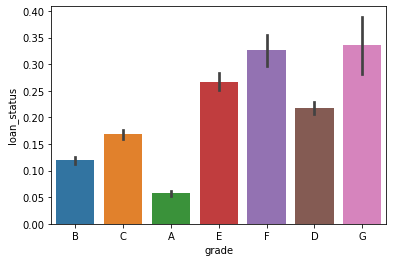

In [29]:
sns.barplot(x="grade", y="loan_status", data=df)
plt.show()

#### Let's create a function to plot `loan_status` across `any categorical variable`

In [30]:
def plot_cat(categorical_variable):
    sns.barplot(x=categorical_variable, y="loan_status", data=df)
    plt.figure(figsize = (10, 6))
    plt.show()

#### How's default rates across grade of loan?

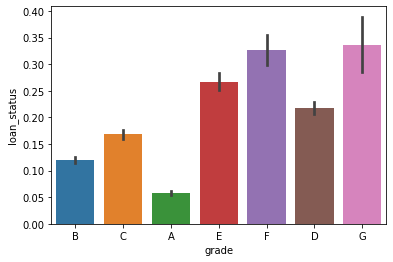

<Figure size 720x432 with 0 Axes>

In [31]:
plot_cat("grade")

> What is your `interpretation`? 

> Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

#### `term`

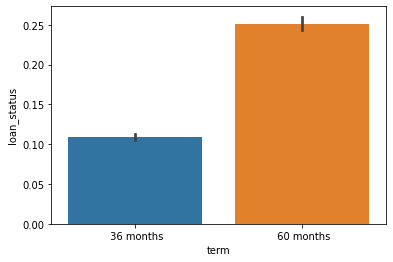

<Figure size 720x432 with 0 Axes>

In [32]:
plot_cat("term")

> `Interpretation`?

> `60 months loans default more than 36 months loans`

#### `home_ownership`

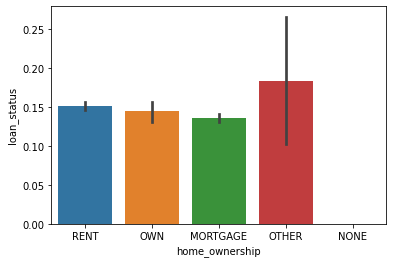

<Figure size 720x432 with 0 Axes>

In [33]:
plot_cat("home_ownership")

> Interpretation?

>Not a great discriminator

#### The role of `verification_status`?

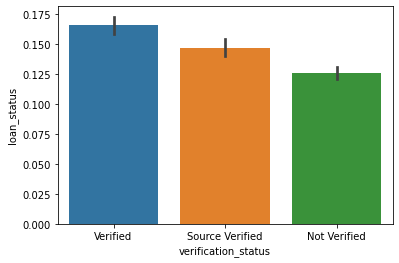

<Figure size 720x432 with 0 Axes>

In [34]:
plot_cat("verification_status")

`Interpretation`?

> Surprisingly, verified loans- default more than not verified

#### The role of Loan `purpose`?

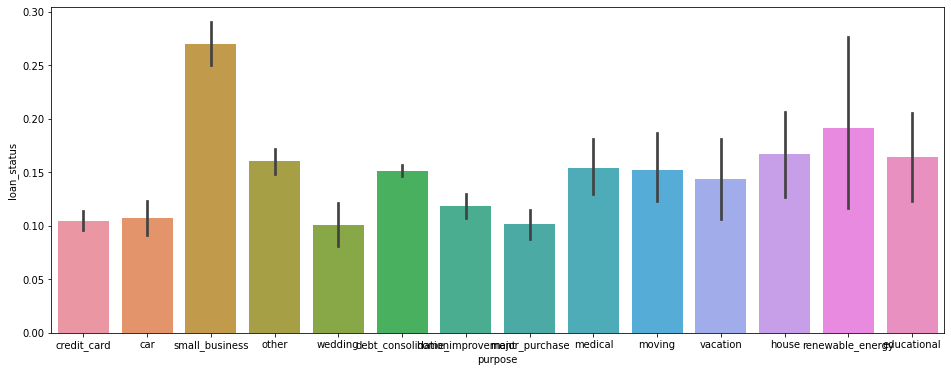

<Figure size 720x432 with 0 Axes>

In [35]:
plt.figure(figsize=(16, 6))
plot_cat("purpose")

> `Interpretation?`

> Small business loans default the most, then renewable energy and education

#### Now, let's also observe the distribution of loans across years.

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [36]:
df["issue_d"].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

> Yes, please use `lambda`.

In [37]:
from datetime import datetime
df["issue_d"] = df["issue_d"].apply(lambda x: datetime.strptime(x, "%b-%y"))

> Please extract month and year from `issue_d`, using `lambda`.

In [38]:
df["month"] = df["issue_d"].apply(lambda x: x.month)
df["year"] = df["issue_d"].apply(lambda x: x.year)

> How would you examine the number of loans granted across years?

In [39]:
df.groupby("year").year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [40]:
df.groupby("month").month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

`Interpretation`?

> Most loans are granted in December, and in general in the latter half of the year.

#### Lets compare the default rates across years

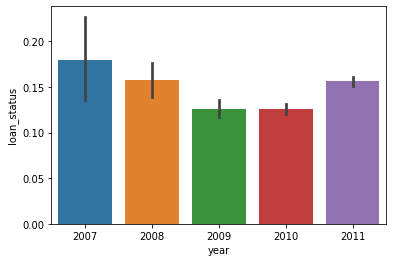

<Figure size 720x432 with 0 Axes>

In [41]:
plot_cat("year")

> `Interpretation`?

> The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

#### Let's compare default rates across months

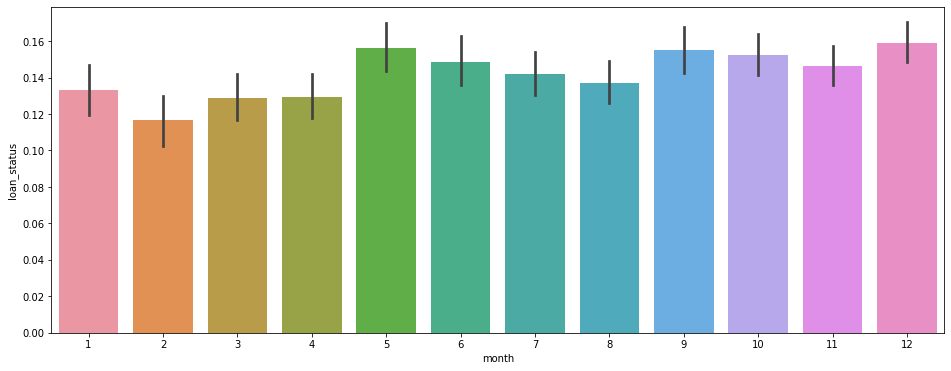

<Figure size 720x432 with 0 Axes>

In [42]:
plt.figure(figsize=(16, 6))
plot_cat("month")

> `Interpretation`? 

> Not much variation across months

### Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

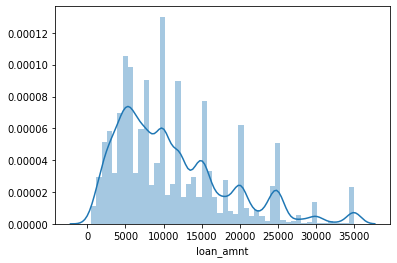

In [43]:
sns.distplot(df["loan_amnt"])
plt.show()

> `Interpretation`?

> The median loan amount is around 10,000

> One way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [44]:
def loan_amount(n):
    if n < 5000:
        return "low"
    elif n >=5000 and n < 15000:
        return "medium"
    elif n >= 15000 and n < 25000:
        return "high"
    else:
        return "very high"
    
df["loan_amnt"] = df["loan_amnt"].apply(lambda x: loan_amount(x))

In [45]:
df["loan_amnt"].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

> Let's compare the default rates across loan amount type

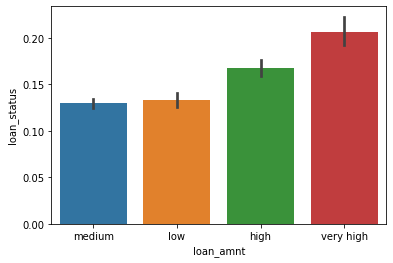

<Figure size 720x432 with 0 Axes>

In [46]:
plot_cat("loan_amnt")

> `Interpretation`?

> higher the loan amount, higher the default rate

#### Let's also convert funded amount invested to bins (using the same scheme)

In [47]:
df["funded_amnt_inv"] = df["funded_amnt_inv"].apply(lambda x: loan_amount(x))

> Visualize the results

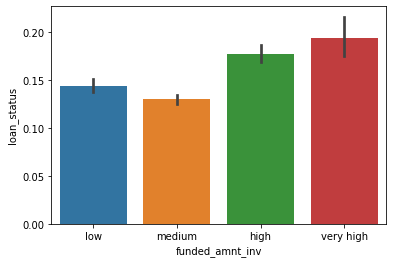

<Figure size 720x432 with 0 Axes>

In [48]:
plot_cat("funded_amnt_inv")

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new variable.

In [49]:
def int_rate(n):
    if n <= 10:
        return "low"
    elif n > 10 and n <=15:
        return "medium"
    else:
        return "high"
    
    
df["int_rate"] = df["int_rate"].apply(lambda x: int_rate(x))

> Let's compare default rates across rates of interest

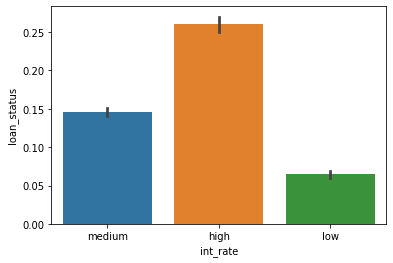

<Figure size 720x432 with 0 Axes>

In [50]:
plot_cat("int_rate")

> `Interpretaion`?

> high interest rates default more, as expected

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [51]:
def dti(n):
    if n <= 10:
        return "low"
    elif n > 10 and n <=20:
        return "medium"
    else:
        return "high"
    

df["dti"] = df["dti"].apply(lambda x: dti(x))

> Let's comparing default rates across debt to income ratio

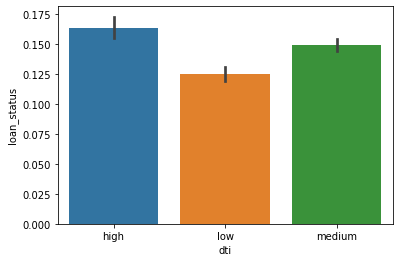

<Figure size 720x432 with 0 Axes>

In [52]:
plot_cat("dti")

> `Interpretation`?

> High dti translates into higher default rates, as expected

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [53]:
def funded_amount(n):
    if n <= 5000:
        return "low"
    elif n > 5000 and n <=15000:
        return "medium"
    else:
        return "high"
    

In [54]:
df["funded_amnt"] = df["funded_amnt"].apply(lambda x: funded_amount(x))

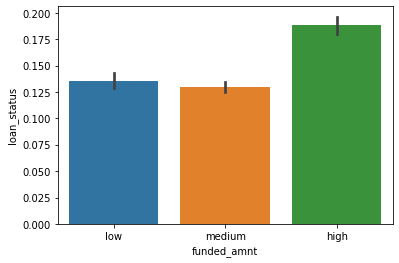

<Figure size 720x432 with 0 Axes>

In [55]:
plot_cat("funded_amnt")

#### installment

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [56]:
def installment(n):
    if n <= 200:
        return "low"
    elif n > 200 and n <=400:
        return "medium"
    elif n > 400 and n <=600:
        return "high"
    else:
        return "very high"
    
df["installment"] = df["installment"].apply(lambda x: installment(x))

> Let's compare default rates across installment

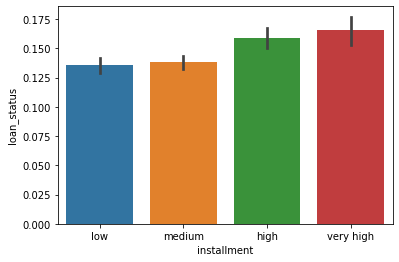

<Figure size 720x432 with 0 Axes>

In [57]:
plot_cat("installment")

> `Interpretation`?

> The higher the installment amount, the higher the default rate

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [58]:
def annual_income(n):
    if n <= 50000:
        return "low"
    elif n > 50000 and n <=100000:
        return "medium"
    elif n > 100000 and n <=150000:
        return "high"
    else:
        return "very high"

df["annual_inc"] = df["annual_inc"].apply(lambda x: annual_income(x))

> Visualize the results.

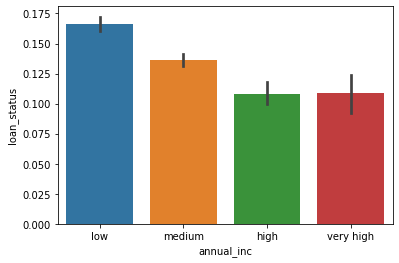

<Figure size 720x432 with 0 Axes>

In [59]:
plot_cat("annual_inc")

> What's your interpretation?

#### Employment Length

> First, let's drop the missing value observations in `emp_length`

In [60]:
df = df[~df["emp_length"].isnull()]

> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [61]:
def emp_length(n):
    if n <= 1:
        return "fresher"
    elif n > 1 and n <=3:
        return "junior"
    elif n > 3 and n <=7:
        return "senior"
    else:
        return "expert"

df["emp_length"] = df["emp_length"].apply(lambda x: emp_length(x))

> Visualize the results

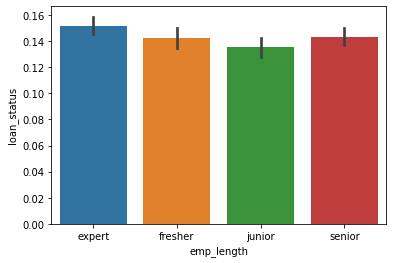

<Figure size 720x432 with 0 Axes>

In [62]:
plot_cat("emp_length")

> What's your `interetation`?

### Segmented Univariate Analysis



##### Loan Purpose (`purpose`)

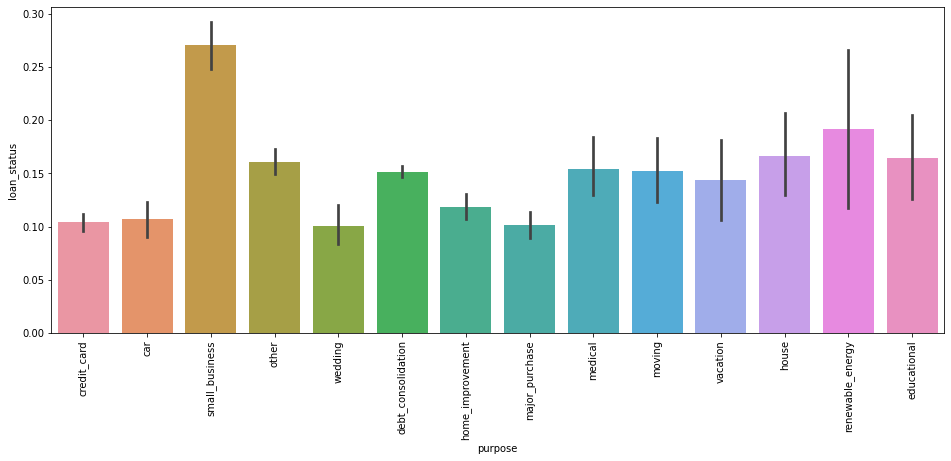

<Figure size 720x432 with 0 Axes>

In [63]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plot_cat("purpose")

`Interpretation`?

> small business loans defualt the most, then renewable energy and education

#### Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

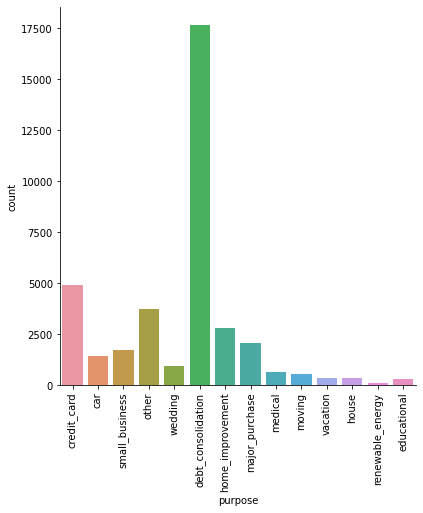

In [64]:
cp = sns.catplot(x="purpose", kind = "count", data=df, height = 6)
cp.set_xticklabels(rotation=90)

> Please analyze the top 4 types of loans based on purpose

> consolidation, credit card, home improvement and major purchase.

#### Let's filter the df for the 4 types of loans mentioned above

In [65]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df["purpose"].isin(main_purposes)]
df["purpose"].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

#### Visualize the number of loans by purpose 

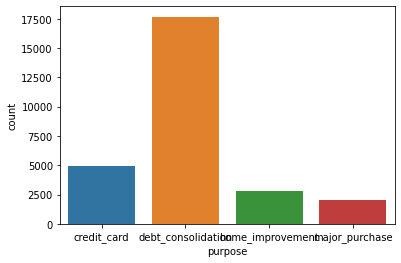

In [66]:
sns.countplot(x=df["purpose"])
plt.show()

> let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

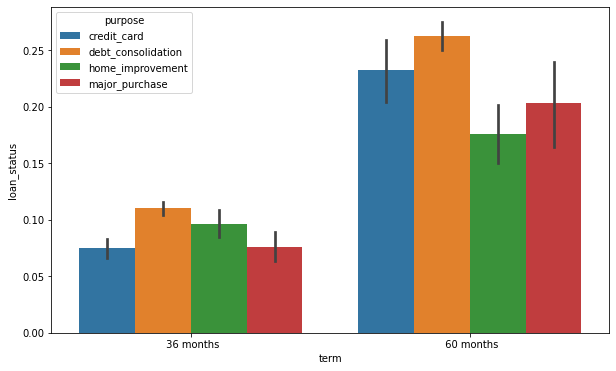

In [67]:
plt.figure(figsize=[10, 6])
sns.barplot(x="term", y="loan_status", hue="purpose", data=df)
plt.show()

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please create your function named `plot_segmented`

In [68]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y="loan_status", hue="purpose", data=df)
    plt.show()

> Let's use the function to see if there's differences in the term.

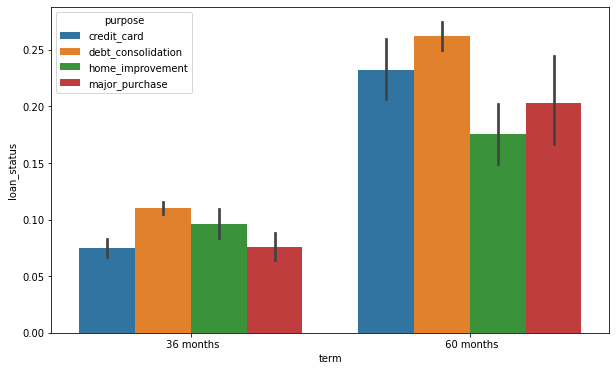

In [69]:
plot_segmented("term")

#### Grade of Loan (`grade`)

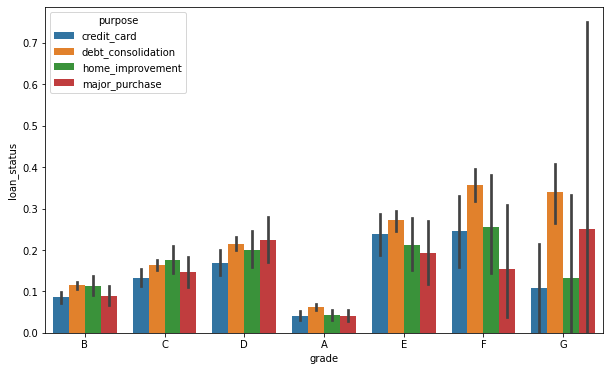

In [70]:
plot_segmented("grade")

#### home ownership(`home_ownership`)

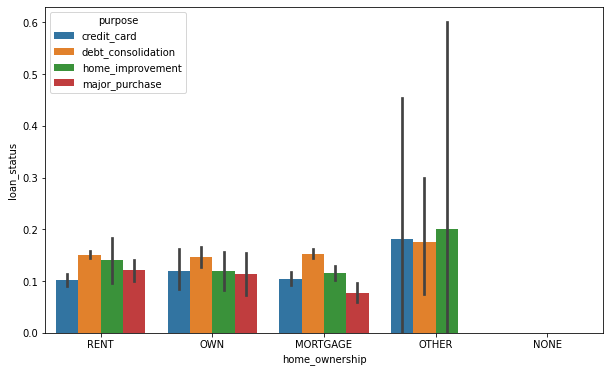

In [71]:
plot_segmented("home_ownership")

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

#### `year`

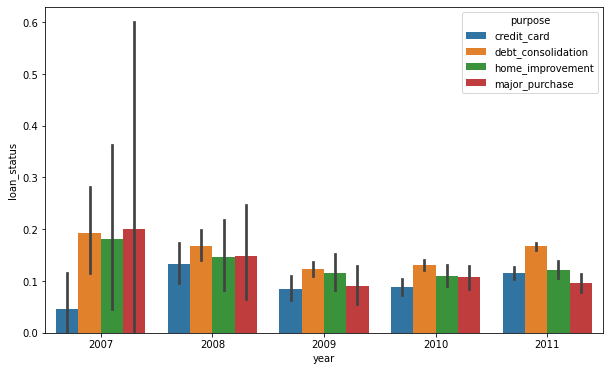

In [72]:
plot_segmented("year")

#### `emp_length`

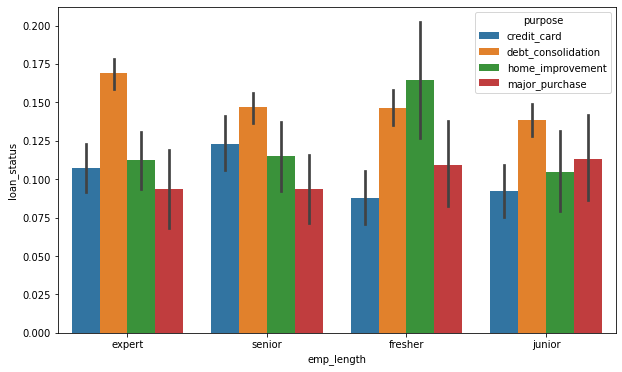

In [73]:
plot_segmented("emp_length")

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

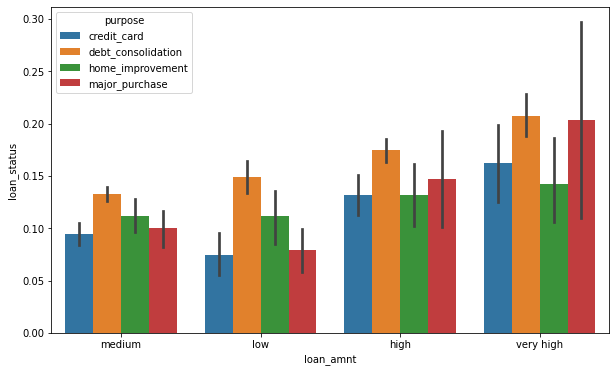

In [74]:
plot_segmented("loan_amnt")

> interest rate (`int_rate`)

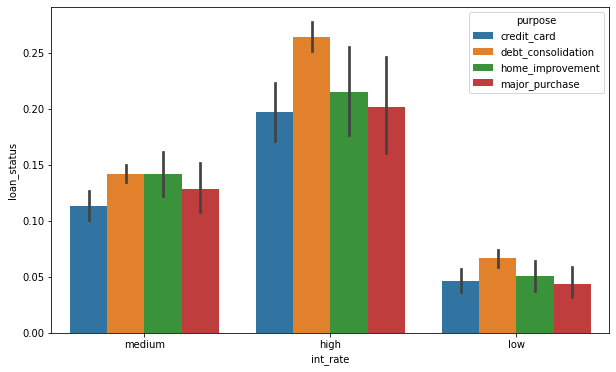

In [75]:
plot_segmented("int_rate")

> `installment`

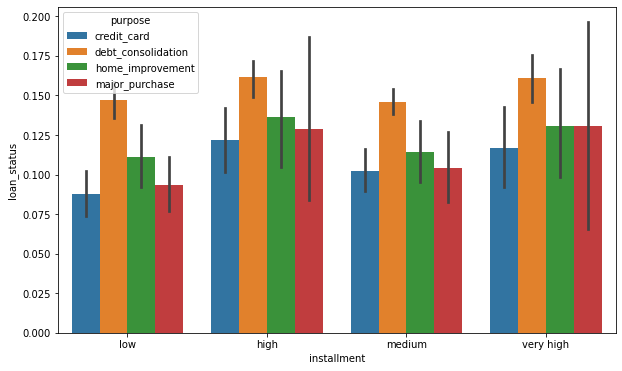

In [76]:
plot_segmented("installment")

> debt-to-income (`dti`) ratio

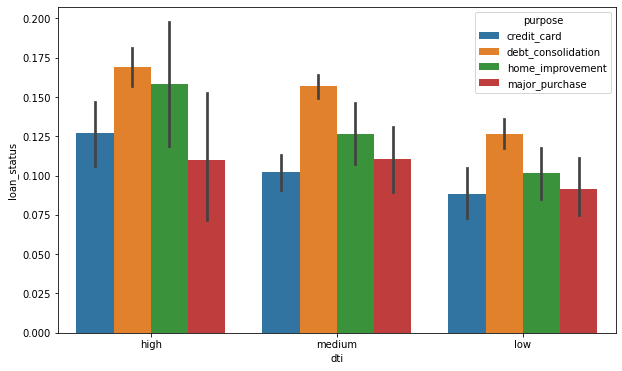

In [77]:
plot_segmented("dti")

> Let's have a look at the role of `annual_income`

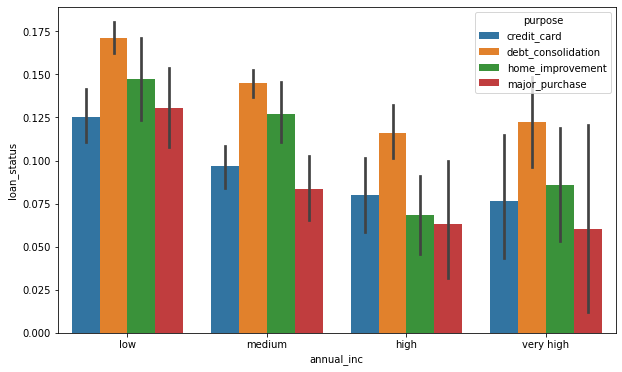

In [78]:
plot_segmented("annual_inc")

> A good way to quantify th effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

In [79]:
df.groupby("annual_inc").loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

> You might want to write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [80]:
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

> Please use the function and draw some insights :)

In [81]:
default_rates, diff = diff_rate("annual_inc")
print(default_rates);print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


> Thus, there is a ***`6%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### References

### Appendix

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### Contribution Statements

> `Thank you for working with the script :)`

In [82]:
exit()